In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
X,y = make_blobs(n_samples =150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)


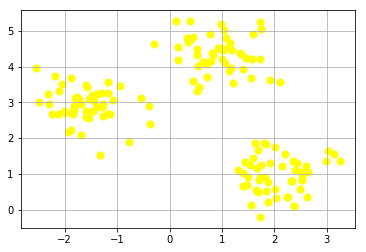

In [3]:
plt.scatter(X[:,0],X[:,1],c="yellow",marker="o",s=50)
plt.grid()
plt.show()

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init="random",n_init=10,max_iter=300,tol=0.0001,random_state=0)
y_km =km.fit_predict(X)

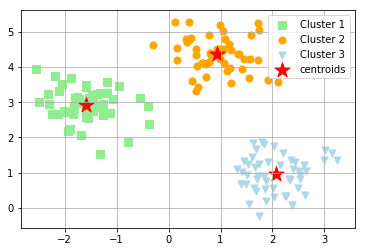

In [5]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c="lightgreen",marker="s",label='Cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c="orange",marker="o",label='Cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c="lightblue",marker="v",label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c="red",marker="*",label='centroids')
plt.legend()
plt.grid()
plt.show()

In [6]:
print("Distortion: {}".format(km.inertia_))

Distortion: 72.47601670996698


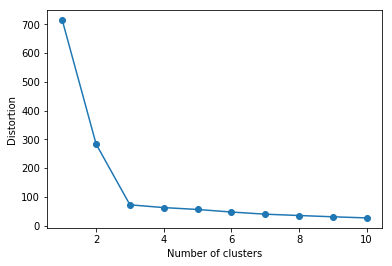

In [7]:
distortions=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [8]:
km = KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300,tol=0.0001,random_state=0)
y_km =km.fit_predict(X)

In [9]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
clusters_labels = np.unique(y_km)
n_clusters = clusters_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric="euclidean")
y_ax_lower,y_ax_upper=0,0
yticks=[]

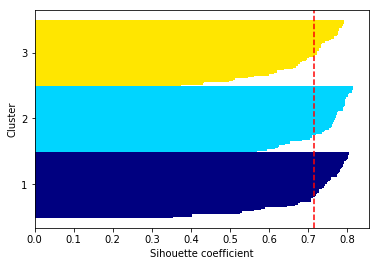

In [10]:
for i,c in enumerate(clusters_labels):
    c_silhouette_vals=silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper+=len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor="None",color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower+=len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks,clusters_labels +1)
plt.ylabel("Cluster")
plt.xlabel("Sihouette coefficient")
plt.show()

# Organising clusters as a hierarchial tree

In [11]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X,columns=variables,index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [12]:
from scipy.spatial.distance import pdist,squareform
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels,index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [43]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(df.values,metric='euclidean',method='complete')
ind=[]
for i in range(row_clusters.shape[0]):
    ind.append("cluster {}".format(i+1))
row_clusters.shape[0]
pd.DataFrame(row_clusters,columns=['row label 1','row label 2','distance','no. of items in clust.'],index=ind)

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


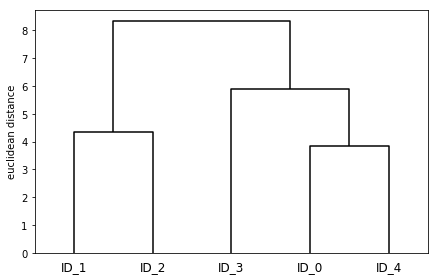

In [16]:
from scipy.cluster.hierarchy import dendrogram
#make dendrogram black(part 1/2)
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters,labels=labels,color_threshold=np.inf)
plt.tight_layout()
plt.ylabel("euclidean distance")
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering as ag
ac= ag(n_clusters=2,affinity="euclidean",linkage="complete")
labels=ac.fit_predict(X)
print("Cluster labels:{}".format(labels))

Cluster labels:[0 1 1 0 0]


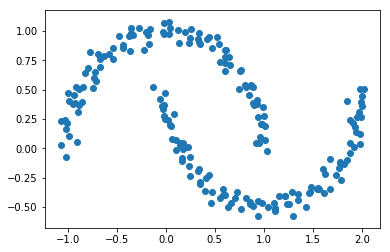

In [20]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

Text(0.5,1,'Agglomerstive Clustering')

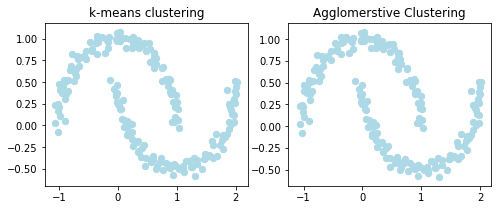

In [33]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
km = KMeans(n_clusters=2,random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],c="lightblue",marker='o',s=40,label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],c="lightblue",marker='o',s=40,label='cluster 2')
ax1.set_title('k-means clustering')
ac= ag(n_clusters=2,affinity='euclidean',linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],c="lightblue",marker='o',s=40,label='cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],c="lightblue",marker='o',s=40,label='cluster 2')
ax2.set_title('Agglomerstive Clustering')

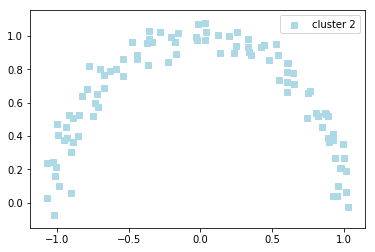

In [34]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,min_samples=5,metric="euclidean")
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],X[y_db==0,1],c="lightblue",marker='s',s=40,label='cluster 2')
plt.legend()
plt.show()

# THE IDEA OF LAST TWO PART SHOWS THE SUPERIORITY OF DBSCAN ALGORITHM